# 이진 탐색 알고리즘
- 순차 탐색 : 리스트 안에 있는 특정한 데이터를 찾기 위해 **앞에서부터 데이터를 하나씩 확인**하는 방법
- 이진 탐색 : 정렬되어 있는 리스트에서 **탐색 범위를 절반씩 좁혀가며 데이터를 탐색**하는 방법
    - 정렬된 데이터에서 탐색 범위를 지정하고, 찾고자 하는 값이 중간값보다 크냐 작냐에 따라 왼쪽 영역만 볼지 오른쪽 영역만 볼지 결정 (절반씩 좁혀짐)

In [2]:
# 이진 탐색 소스코드 : 재귀적 구현

def binary_search(array, target, start, end):
    if start > end:
        return None
    mid = (start + end) // 2
    
    # 찾은 경우 중간점 인덱스 반환
    if array[mid] == target:
        return mid
    elif array[mid] > target:
        return binary_search(array, target, start, mid - 1)
    else:
        return binary_search(array, target, mid + 1, end)
    
result = binary_search([1, 3, 5, 6, 9, 11, 13, 15, 17, 19], 7, 0, 9)
if result == None:
    print('원소가 존재하지 않습니다.')
else:
    print(result + 1)

원소가 존재하지 않습니다.


### 파이썬 이진 탐색 라이브러리
- `bisect_left(a, x)` : 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 왼쪽 인덱스를 반환
- `bisect_right(a, x)` : 정렬된 순서를 유지하면서 배열 a에 x를 삽입할 가장 오른쪽 인덱스를 반환

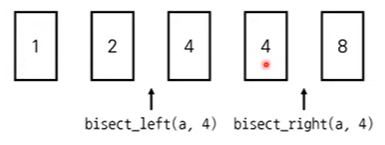

In [3]:
from bisect import bisect_left, bisect_right

a = [1, 2, 4, 4, 8]
x = 4

print(bisect_left(a, x))
print(bisect_right(a, x))

2
4


In [4]:
# 값이 특정 범위에 속하는 데이터 개수 구하기
from bisect import bisect_left, bisect_right

def count_by_range(a, left_value, right_value):
    right_index = bisect_right(a, right_value)
    left_index = bisect_left(a, left_value)
    return right_index - left_index

a = [1, 2, 3, 3, 3, 3, 4, 4, 8, 9]


# 값이 4인 데이터 개수 출력
print(count_by_range(a, 4, 4))
# 값이 [-1, 3] 범위에 있는 데이터 개수 출력
print(count_by_range(a, -1, 3))

2
6


## 파라메트릭 서치(Parametric Search)

- 최적화 문제를 결정 문제('예' 혹은 '아니오')로 바꾸어 해결하는 기법
- 일반적인 코딩 테스트에서 파라메트릭 서치 문제는 이진 탐색을 이용하여 해결할 수 있음

### <문제> 떡볶이 떡 만들기
- 떡볶이 떡의 길이는 일정하지 않지만, 한 봉지 안에 들어가는 떡의 총 길이는 모두 동일
- 절단기에 높이(H)를 지정하면 줄지어진 떡을 한 번에 절단. 높이가 H보다 긴 떡은 H 윗 부분이 잘리고, 낮은 떡은 잘리지 않음
    - 예를 들어 높이가 19, 14, 10, 17cm인 떡이 나란히 있고 절단기 높이를 15cm로 지정하면 떡의 높이는 15, 14, 10, 15cm가 되고, 잘린 떡의 길이는 4, 0, 0, 2cm이므로 손님은 6cm만큼의 길이를 가져감

- 손님이 왔을 때 요청한 총 길이가 M일 때 적어도 M만큼의 떡을 얻기 위해 절단기에 설정할 수 있는 높이의 최댓값을 구하는 프로그램을 작성

In [13]:
# n : 떡의 개수, m : 요청한 떡의 길이

n, m = 4, 6
stock = [19, 15, 10, 17]
stock.sort(reverse=True)

for h in range(stock[0], 0, -1):
    tmp = [i - h for i in stock if i > h]
    if sum(tmp) >= m:
        break
        
print(h)

15


- 적절한 높이를 찾을 때까지 이진 탐색을 수행하는 방법으로 했어야 함..
- 절단기의 높이는 0부터 10억까지의 정수 중 하나이므로, 이렇게 큰 탐색 범위에서는 가장 먼저 이진탐색을 사용해야 한다!

In [17]:
n, m = 4, 6
stock = [19, 15, 10, 17]

start = 0
end = max(stock)

result = 0

# 재귀문이 아니라 반복문으로 하면 이런 원리. 코드 외우기
while start <= end:
    total = 0
    mid = (start + end) // 2
    for x in stock:
        # 잘랐을 때의 양 계산
        if x > mid:
            total += x - mid
            
    # 떡의 양이 부족한 경우 왼쪽 부분 탐색
    if total < m:
        end = mid - 1
    else:
        result = mid
        start = mid + 1
        
print(result)

15


### <문제> 정렬된 배열에서 특정 수의 개수 구하기
- N개의 원소를 포함하고 있는 수열이 오름차순으로 정렬되어 있음
- 이때 수열에서 x가 등장하는 횟수를 계산하시오
- 단, 이 문제는 시간 복잡도 $O(logN)$ 으로 알고리즘을 설계해야 함

In [28]:
array = [1, 1, 2, 2, 2, 2, 3]
x = 2

from bisect import bisect_left, bisect_right

left_index = bisect_left(array, x)
right_index = bisect_right(array, x)
result = right_index - left_index

if result == 0:
    print(-1)
else:
    print(result)

4


### 요약
- 이진 탐색 소스코드
```python
while start <= end:
    total = 0
    mid = (start + end) // 2
    if mid > target:
        end = mid - 1
    elif mid < target:
        start = mid + 1
    else:   # mid == target
        break      
print(mid)
```


- 이진 탐색으로 범위(또는 값) 개수 구하기
- `from bisect import bisect_left(a, x), bisect_right(a, x)`
      